# Example: IF_curve_LIF

https://brian2.readthedocs.io/en/stable/examples/IF_curve_LIF.html

In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
# sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
sys.path.append('/home/francesco/Developing/B2L/brian2lava')

In [2]:
from brian2 import *

# Import Brian2Lava
import brian2lava

# Set device
set_device('lava', hardware='CPU', debug=True)

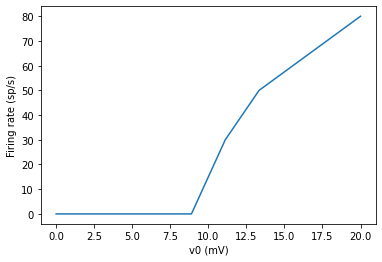

In [3]:
n = 10  # 1000
duration = 100*msecond
tau = 10*ms
eqs = '''
dv/dt = (v0 - v) / tau : volt (unless refractory)
v0 : volt
'''
group = NeuronGroup(n, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    refractory=5*ms, method='exact')
group.v = 0*mV
group.v0 = '20*mV * i / (n-1)'

monitor = SpikeMonitor(group)

run(duration)

plot(group.v0/mV, monitor.count / duration)
xlabel('v0 (mV)')
ylabel('Firing rate (sp/s)')
show()